In [1]:
import pandas as pd # reading data frames
import seaborn as sns #data visulaisation
import matplotlib.pyplot as plt #data visulaisation
from sklearn.ensemble import RandomForestClassifier # algorothim used for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time 
from sklearn.svm import SVC # SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit"
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# loading data set
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()# to get first five data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
fixed acidity           1596 non-null float64
volatile acidity        1596 non-null float64
citric acid             1596 non-null float64
residual sugar          1596 non-null float64
chlorides               1596 non-null float64
free sulfur dioxide     1596 non-null float64
total sulfur dioxide    1596 non-null float64
density                 1596 non-null float64
pH                      1596 non-null float64
sulphates               1596 non-null float64
alcohol                 1596 non-null float64
quality                 1596 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [5]:
# there is no null values or we can check how many null values are there in the data set
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# preprocesing of data
bins = (2,6.5,8)# here we are cheking the quality of wine so we will create 2 band of quality
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins,labels= group_names)# we are replacing the quality column with label
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality = LabelEncoder()# we have defined the label for quality
wine['quality']= label_quality.fit_transform(wine['quality'])# applying label to column
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [8]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
# to check more info about quality we will use value_counts
wine['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

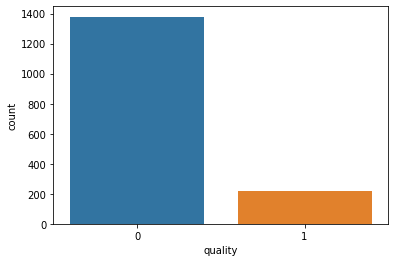

In [10]:
# plot the graph
sns.countplot(wine['quality'])

In [11]:
# separte data set in x,Y
X= wine.drop('quality',axis = 1)# X is  all features-quality
y= wine['quality']#y is quality is what we are looking for

In [12]:
# train n test the data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)# test size is 20%

In [ ]:
#y_train= ans we are looking for

In [14]:
# applying standard scaler to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [18]:
X_train[:10]

array([[-1.26843280e+00, -1.15992969e+00, -1.16552574e-01,
        -1.71339971e-01, -3.48419349e-01,  6.81596039e-01,
         3.32657330e-01, -2.10477887e-01,  7.05309843e-01,
         1.86378152e+00,  1.68143759e-01],
       [ 1.62417171e-01, -1.10356109e+00,  6.56962079e-01,
         4.45196336e-02, -1.02169773e-01,  3.60552501e-03,
         6.33146325e-01,  5.78436588e-01, -7.01410306e-02,
        -1.07728849e+00, -9.62562098e-01],
       [ 1.82220314e+00, -1.18811399e+00,  1.37890909e+00,
        -3.15246374e-01, -8.16489746e-02, -1.06180814e+00,
        -9.59445345e-01,  1.04437265e+00, -2.13801003e+00,
         2.43191925e-01, -1.15101307e+00],
       [ 1.87943714e+00, -2.86216417e-01,  6.56962079e-01,
        -8.18918784e-01,  6.19966116e-02, -9.64952352e-01,
        -5.68809653e-01,  1.65447802e-01, -1.55642187e+00,
        -5.69172591e-02, -3.65800677e-01],
       [ 3.34119167e-01, -2.58032117e-01,  1.32734145e+00,
         1.05186445e+00,  2.67204592e-01, -1.25551972e+00,
  

In [19]:
# RandomForestClassifier - used for mrdium size data set


In [22]:
rfc = RandomForestClassifier(n_estimators = 200)#how many models we need or 200 trees
rfc.fit(X_train,y_train)# features and the quality
pred_rfc = rfc.predict(X_test)# on what we are predicting th output


In [24]:
pred_rfc[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [25]:
#first 30 values

In [26]:
# lets see th accuracy
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       277
           1       0.78      0.33      0.46        43

    accuracy                           0.90       320
   macro avg       0.84      0.66      0.70       320
weighted avg       0.89      0.90      0.88       320



In [27]:
# SVM Classifier = smaller data
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [31]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       277
           1       0.73      0.26      0.38        43

    accuracy                           0.89       320
   macro avg       0.81      0.62      0.66       320
weighted avg       0.87      0.89      0.86       320

[[273   4]
 [ 32  11]]


In [32]:
# Neural Network = huge amt of data